In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helper import find_potential_extrema, PWCT, find_corrected_extrema

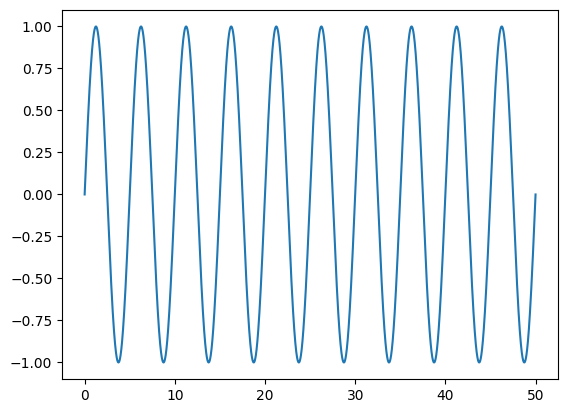

In [2]:
duration = 50
fs = 200
f = 0.2
x = np.linspace(0, duration, fs*duration)
y = np.sin(2*np.pi*f*x)
_ = plt.plot(x, y)

In [3]:
peaks, troughs = find_potential_extrema(y)

In [4]:
peaks_idx, troughs_idx = PWCT(peaks, troughs)

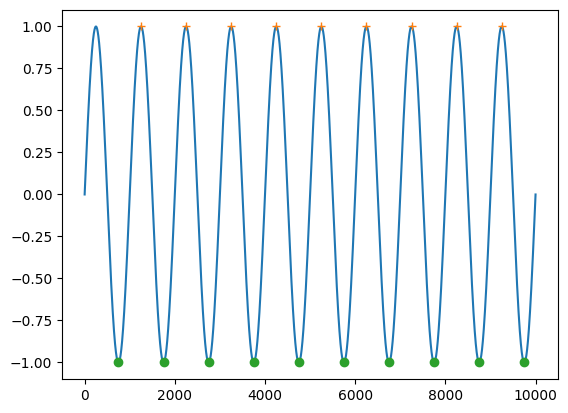

In [5]:
_ = plt.plot(y)
_ = plt.plot(peaks_idx, y[peaks_idx], '+')
_ = plt.plot(troughs_idx, y[troughs_idx], 'o')

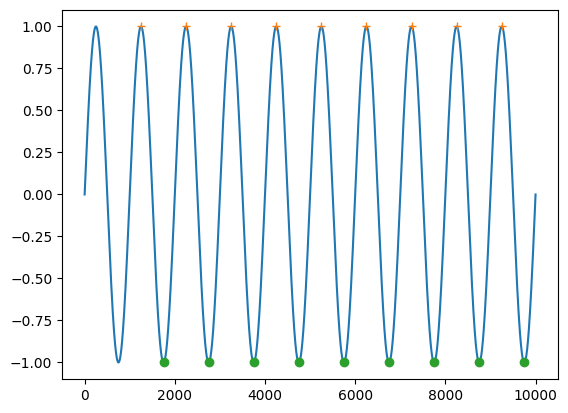

In [6]:
corrected_peaks, corrected_troughs = find_corrected_extrema(y, peaks_idx, troughs_idx)

_ = plt.plot(y)
_ = plt.plot(corrected_peaks, y[corrected_peaks], '+')
_ = plt.plot(corrected_troughs, y[corrected_troughs], 'o')

In [7]:
def plot_corrected_vs_potential(signal, 
        potential_peaks, potential_troughs, \
        corrected_peaks, corrected_troughs):
    _ = plt.plot(signal, 'k', alpha = .1, label = 'signal')
    _ = plt.scatter(corrected_peaks, signal[corrected_peaks], marker=8, c='y', label='corrected peaks')
    _ = plt.scatter(corrected_troughs, signal[corrected_troughs], marker=10, c='y', label='corrected troughs')
    _ = plt.scatter(potential_peaks, signal[potential_peaks], marker=9, c='r', label='potential peaks')
    _ = plt.scatter(potential_troughs, signal[potential_troughs], marker=11, c='r', label='potential troughs')
    _ = plt.legend()

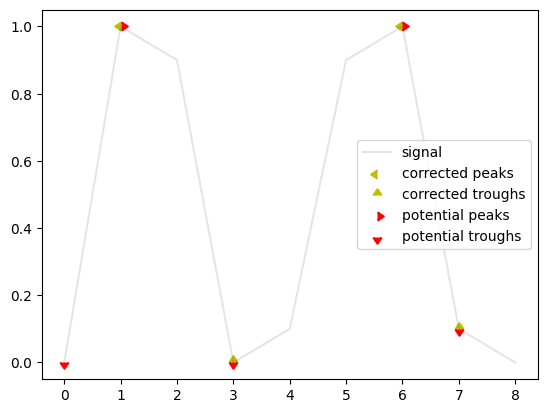

In [8]:
start_with_peak = np.array([0, 1, .9, 0, .1, .9, 1, .1, 0])
potential_peaks = [1, 6]
potential_troughs = [0, 3, 7]
corrected_peaks, corrected_troughs = find_corrected_extrema(start_with_peak, potential_peaks, potential_troughs)

plot_corrected_vs_potential(start_with_peak, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)

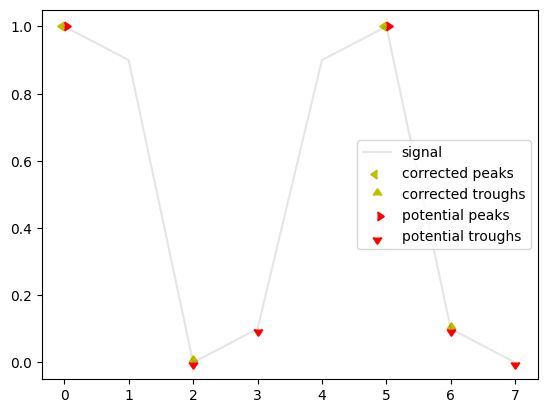

In [9]:
remove_trough = np.array([1, .9, 0, .1, .9, 1, .1, 0])
potential_peaks = [0, 5]
potential_troughs = [2, 3, 6, 7]
corrected_peaks, corrected_troughs = find_corrected_extrema(remove_trough, [0, 5], [2, 3, 6, 7])

plot_corrected_vs_potential(remove_trough, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)